# ***Phase 1 <br> Data Exploratory Analysis***



In [1]:
# @title ### ***Note : Importing Libraries***
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes='True')

In [2]:
# @title ### ***Note : Load Data into np Dataframe***
cars = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/data_car.csv")
cars.head(5) #top 5
cars.tail(5) #buttom 5

Make   Model  Year                Engine Fuel Type  Engine HP  \
11909    Acura     ZDX  2012     premium unleaded (required)      300.0   
11910    Acura     ZDX  2012     premium unleaded (required)      300.0   
11911    Acura     ZDX  2012     premium unleaded (required)      300.0   
11912    Acura     ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln  Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
11909               6.0         AUTOMATIC    all wheel drive              4.0   
11910               6.0         AUTOMATIC    all wheel drive              4.0   
11911               6.0         AUTOMATIC    all wheel drive              4.0   
11912               6.0         AUTOMATIC    all wheel drive              4.0   
11913               6.0         AUTOMATIC  front wheel drive              4.0   

                  Market Category Vehicle Size  Vehicle Style  highway MPG  \
11909  Crossover,Hatchback,Luxury      Midsize  4dr Hatchback           23   
11910  Crossover,Hatchback,Luxury      Midsize  4dr Hatchback           23   
11911  Crossover,Hatchback,Luxury      Midsize  4dr Hatchback           23   
11912  Crossover,Hatchback,Luxury      Midsize  4dr Hatchback           23   
11913                      Luxury      Midsize          Sedan           26   

       city mpg  Popularity   MSRP  
11909        16         204  46120  
11910        16         204  56670  
11911        16         204  50620  
11912        16         204  50920  
11913        17          61  28995

In [3]:
# @title ### ***Note : Checking Data Type***
cars.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [4]:
# @title ### ***Rename Column***
cars = cars.rename(columns={'Engine HP':'HP', 'Engine Cylinders':'Cylinders','Transmission Type':'Transmission',
                           'Market Category':'Market',"MSRP": "Price"} )
cars.head()

Make       Model  Year             Engine Fuel Type     HP  Cylinders  \
0  BMW  1 Series M  2011  premium unleaded (required)  335.0        6.0   
1  BMW    1 Series  2011  premium unleaded (required)  300.0        6.0   
2  BMW    1 Series  2011  premium unleaded (required)  300.0        6.0   
3  BMW    1 Series  2011  premium unleaded (required)  230.0        6.0   
4  BMW    1 Series  2011  premium unleaded (required)  230.0        6.0   

  Transmission     Driven_Wheels  Number of Doors  \
0       MANUAL  rear wheel drive              2.0   
1       MANUAL  rear wheel drive              2.0   
2       MANUAL  rear wheel drive              2.0   
3       MANUAL  rear wheel drive              2.0   
4       MANUAL  rear wheel drive              2.0   

                                  Market Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity  Price  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [5]:
# @title ### ***Delete unrelevant column***
cars = cars.drop(['Engine Fuel Type', 'Market', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
cars.head(5)

Make       Model  Year     HP  Cylinders Transmission     Driven_Wheels  \
0  BMW  1 Series M  2011  335.0        6.0       MANUAL  rear wheel drive   
1  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
2  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
3  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   
4  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   

   highway MPG  city mpg  Price  
0           26        19  46135  
1           28        19  40650  
2           28        20  36350  
3           28        18  29450  
4           28        18  34500

In [6]:
# @title ### ***Note : Total Colums and Rows***
cars.shape

(11914, 10)

In [7]:
# @title ### ***Note : Total rows for each Columns having value***
cars.count()

Make             11914
Model            11914
Year             11914
HP               11845
Cylinders        11884
Transmission     11914
Driven_Wheels    11914
highway MPG      11914
city mpg         11914
Price            11914
dtype: int64

In [8]:
# @title ### ***Note : Fill null value***
cars['HP'] = cars['HP'].fillna(cars['HP'].mean())
cars.count()
#cars[['HP', 'Cylinders']] = cars[['HP', 'Cylinders']].fillna(cars[['HP', 'Cylinders']].mean()) #For Multiple Columns
#cars = cars.fillna(cars.mean())  For All Columns

Make             11914
Model            11914
Year             11914
HP               11914
Cylinders        11884
Transmission     11914
Driven_Wheels    11914
highway MPG      11914
city mpg         11914
Price            11914
dtype: int64

In [9]:
# @title ### ***Note : Total Duplicate Rows***
duplicate_cars = cars[cars.duplicated()]
print("Total unique rows:", duplicate_cars.shape)

Total unique rows: (989, 10)


In [10]:
# @title ### ***Note : Delete Duplicate Rows***
cars.drop_duplicates()
cars.shape

(11914, 10)

In [11]:
# @title ### ***Note : Check column who have null values***
print(cars.isnull().sum())

Make              0
Model             0
Year              0
HP                0
Cylinders        30
Transmission      0
Driven_Wheels     0
highway MPG       0
city mpg          0
Price             0
dtype: int64


In [12]:
# @title ### ***Note : Deleted Rows with null values***
cars = cars.dropna()
cars.count()

Make             11884
Model            11884
Year             11884
HP               11884
Cylinders        11884
Transmission     11884
Driven_Wheels    11884
highway MPG      11884
city mpg         11884
Price            11884
dtype: int64

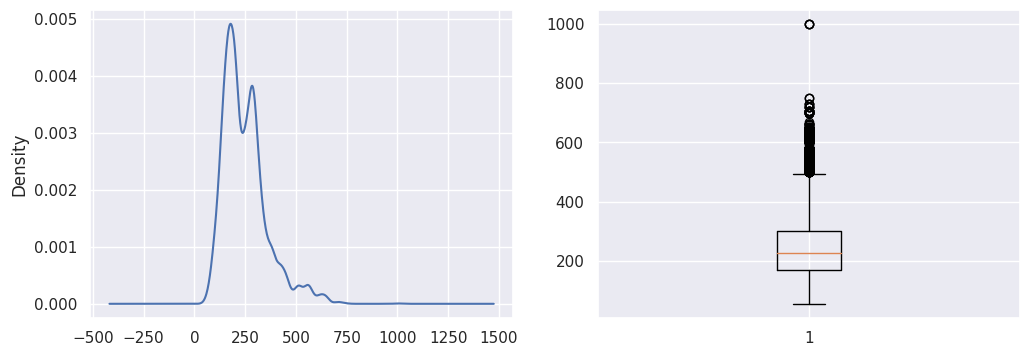

In [13]:
# @title ### ***Note : Detecting Outliers/ Detecting Anomaly Value data***
f= plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
cars['HP'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(cars['HP'])
plt.show()

<Axes: xlabel='Cylinders'>

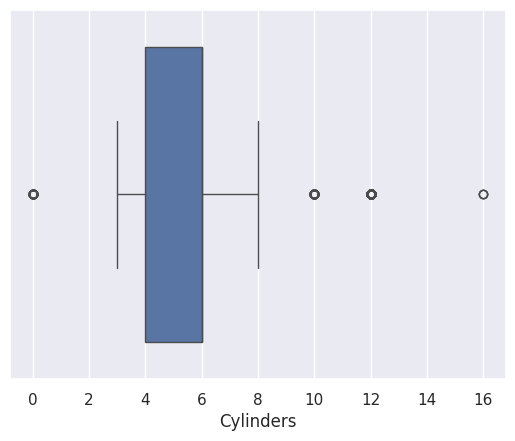

In [14]:
# @title ### ***Note : Visual Outliers/ Detecting Anomaly Value data***
#sns.boxplot(x=cars['Price'])
#sns.boxplot(x=cars['HP'])
sns.boxplot(x=cars['Cylinders'])

### ***Data Normalization***



*   Simple Feature Scaling <br>
    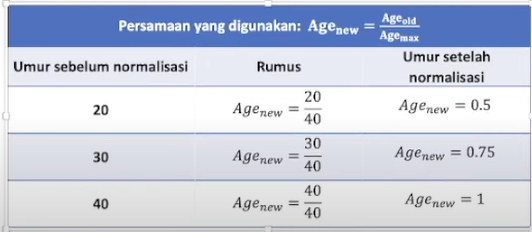
*   Min-Max Normalization <br>
    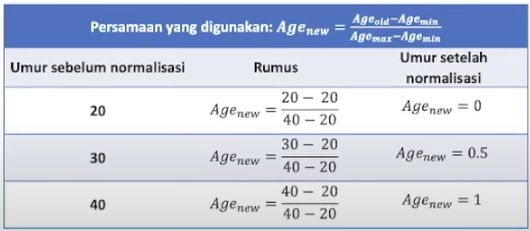
* Mean Normalization <br>
    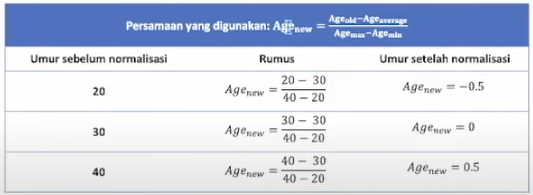
* Standarization (Z-Score Normalization)<br>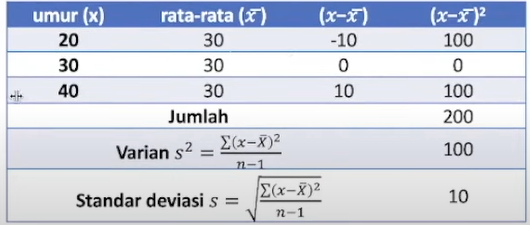
<br><br>
### ***Data Discretizasion***  <br>
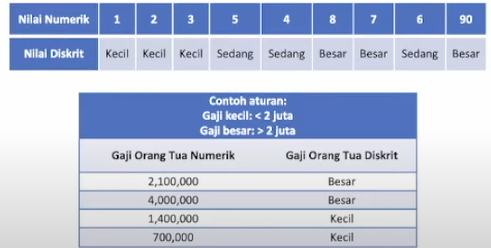

***One-Hot Encoding*** <br>
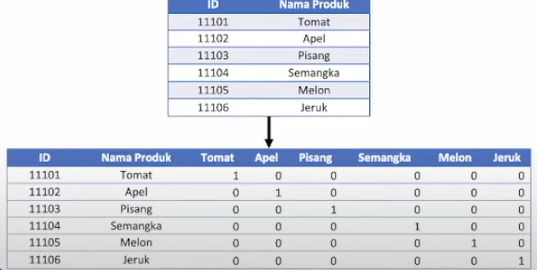

In [15]:
cars.Price.describe()

count    1.188400e+04
mean     4.062488e+04
std      6.018035e+04
min      2.000000e+03
25%      2.099500e+04
50%      2.999500e+04
75%      4.230000e+04
max      2.065902e+06
Name: Price, dtype: float64

Text(0, 0.5, 'Make')

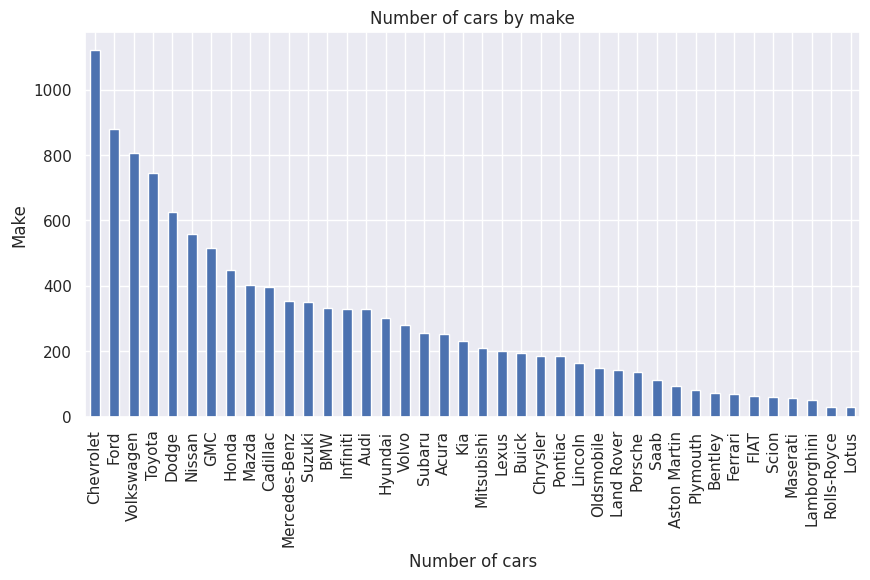

In [16]:
cars.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.xlabel('Number of cars')
plt.ylabel('Make')

Driven_Wheels     all wheel drive  four wheel drive  front wheel drive  \
Transmission                                                             
AUTOMATED_MANUAL       419.661616               NaN         190.694079   
AUTOMATIC              277.387078        305.316288         198.162867   
DIRECT_DRIVE           249.386070               NaN         221.379215   
MANUAL                 290.931373        182.600000         150.764493   
UNKNOWN                       NaN        190.000000         125.000000   

Driven_Wheels     rear wheel drive  
Transmission                        
AUTOMATED_MANUAL        481.322581  
AUTOMATIC               303.623471  
DIRECT_DRIVE            220.518408  
MANUAL                  283.514602  
UNKNOWN                 176.538462  


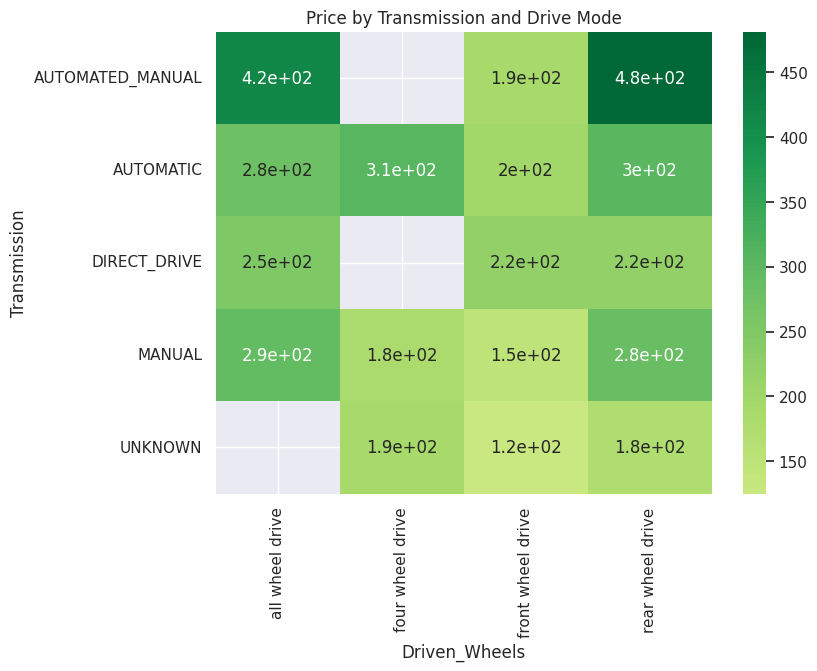

In [17]:
# @title ### ***Note : Analysist Multivariant***
# Create a pivot table
result = cars.pivot_table(index='Transmission', columns='Driven_Wheels', values='HP')
print(result)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(result, annot=True, cmap='RdYlGn', center=0.117)
plt.title('Price by Transmission and Drive Mode')
plt.show()

Year        HP  Cylinders  highway MPG  city mpg     Price
Year         1.000000  0.352377  -0.041479     0.261362  0.202815  0.227560
HP           0.352377  1.000000   0.765437    -0.357669 -0.357163  0.661907
Cylinders   -0.041479  0.765437   1.000000    -0.621606 -0.600776  0.531312
highway MPG  0.261362 -0.357669  -0.621606     1.000000  0.880508 -0.164391
city mpg     0.202815 -0.357163  -0.600776     0.880508  1.000000 -0.165880
Price        0.227560  0.661907   0.531312    -0.164391 -0.165880  1.000000

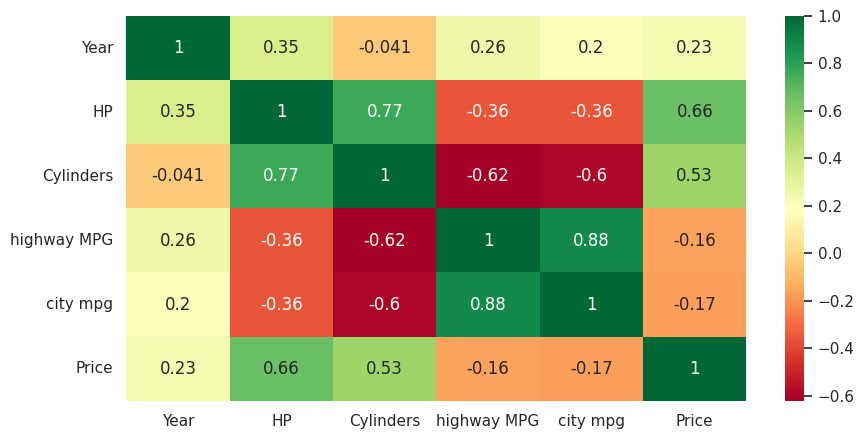

In [18]:
# @title Headmap (Correlation antar attribute)
cars1 = cars.select_dtypes(include=[np.number])

plt.figure(figsize=(10,5))
c= cars1.corr()
sns.heatmap(c,cmap="RdYlGn",annot=True)
c

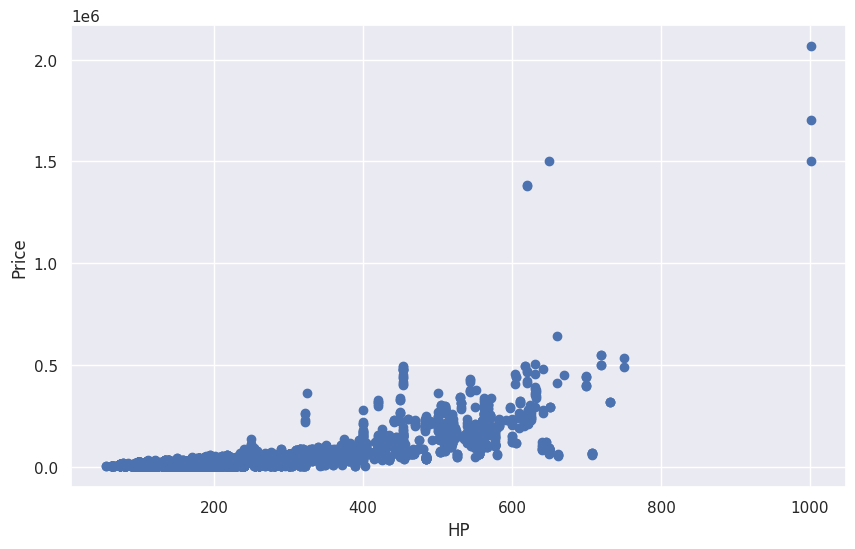

In [19]:
# @title ### ***Note : ScatterPlot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(cars['HP'], cars['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

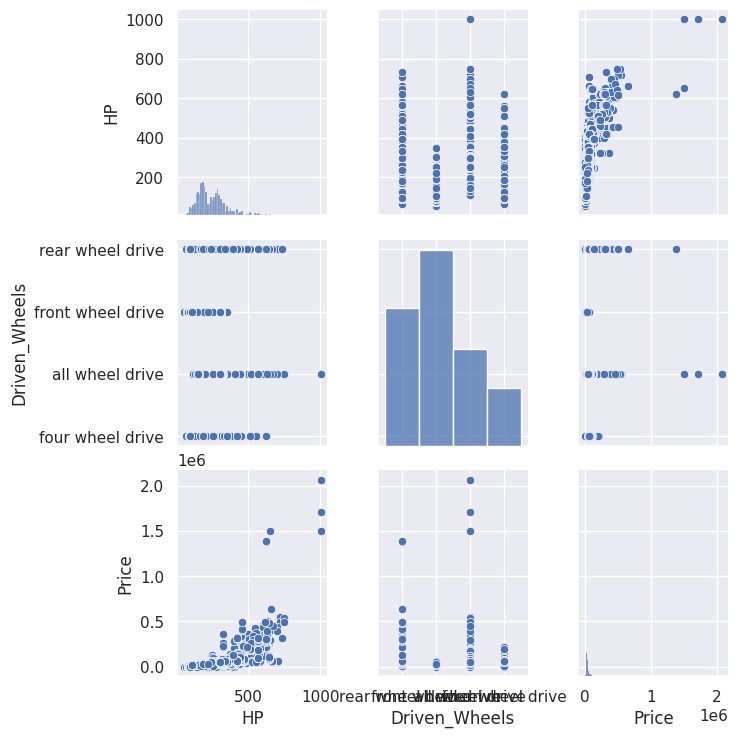

In [20]:
sns.pairplot(data = cars, vars=['HP','Driven_Wheels','Price']) #
plt.show()

In [21]:
# @title ### ***Note : Correlation Matrix***
cars[['HP','Cylinders','Price']].corr()

HP  Cylinders     Price
HP         1.000000   0.765437  0.661907
Cylinders  0.765437   1.000000  0.531312
Price      0.661907   0.531312  1.000000

In [22]:
# @title ### ***Data Normalization*** <br>
#StandardScaler: Standardizes features by removing the mean and scaling to unit variance.
#MinMaxScaler: Transforms features by scaling each feature to a given range.
#MaxAbsScaler: Scales each feature by its maximum absolute value.
#RobustScaler: Scales features using statistics that are robust to outliers.
#Normalizer: Normalizes samples individually to unit norm.
#Binarizer: Binarizes data (set feature values to 0 or 1) according to a threshold.
#OneHotEncoder: Encodes categorical features as a one-hot numeric array.
#LabelEncoder: Encodes target labels with value between 0 and n_classes-1.
#OrdinalEncoder: Encodes categorical features as an integer array.
#PolynomialFeatures: Generates polynomial and interaction features.
#FunctionTransformer: Applies a custom function to the data.
#KBinsDiscretizer: Bins continuous data into intervals.
#PowerTransformer: Applies a power transform (Yeo-Johnson or Box-Cox) to make data more Gaussian-like.
#QuantileTransformer: Transforms features using quantiles information.
#StandardScaler: Standardizes features by removing the mean and scaling to unit variance.

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer, Binarizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer, KBinsDiscretizer
from sklearn.preprocessing import PowerTransformer, QuantileTransformer


gaji = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/datasetgaji2.csv")
gaji.head(5) #top 5
gaji.tail(5) #buttom 5

Nama Status Rumah  Gaji Orang Tua  Umur
1          kekeyi        Milik         4000000    23
2   rangga sasana      Kontrak         1400000    21
3  vicky prasetyo      Kontrak          700000    28
4            Zuko        Milik          650000    27
5           dyrga      Kontrak          450000    22

In [23]:
MinMaxScaler        = MinMaxScaler()
StandardScaler      = StandardScaler()
MaxAbsScaler        = MaxAbsScaler()
RobustScaler        = RobustScaler()
Normalizer          = Normalizer()
Binarizer           = Binarizer()
OneHotEncoder       = OneHotEncoder()
LabelEncoder        = LabelEncoder()
OrdinalEncoder      = OrdinalEncoder()
PolynomialFeatures  = PolynomialFeatures()
FunctionTransformer = FunctionTransformer()
KBinsDiscretizer    = KBinsDiscretizer()
PowerTransformer    = PowerTransformer()
QuantileTransformer = QuantileTransformer()


scaled= MinMaxScaler.fit_transform(gaji[['Gaji Orang Tua','Umur']])
print(scaled)

[[0.46478873 0.42857143]
 [1.         0.28571429]
 [0.26760563 0.        ]
 [0.07042254 1.        ]
 [0.05633803 0.85714286]
 [0.         0.14285714]]


In [24]:
# @title ### ***Data Standarization***

scaled= StandardScaler.fit_transform(gaji[['Gaji Orang Tua','Umur']])
print(scaled)

[[ 0.44733685 -0.06551218]
 [ 1.99268231 -0.45858525]
 [-0.12200096 -1.24473139]
 [-0.69133876  1.5067801 ]
 [-0.73200575  1.11370703]
 [-0.89467369 -0.85165832]]


In [25]:
# @title ### ***Data Binning / Discredization***
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

gaji = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/datasetgaji.csv")
gaji.head(5) #top 5
gaji.tail(5) #buttom 5

Nama Status Rumah  Gaji Orang Tua  Keterangan
1          kekeyi        Milik         4000000         NaN
2   rangga sasana      Kontrak         1400000         NaN
3  vicky prasetyo      Kontrak          700000         NaN
4            zuko        Milik          650000         NaN
5           dyrga      Kontrak          450000         NaN

In [26]:
partisi_group = [0,800000, 1400000, 4000000] #hardcode binning Objective
grouping_Name = ['Kecil','Sedang','Besar']
gaji['category'] =  pd.cut(gaji['Gaji Orang Tua'], bins=partisi_group, labels=grouping_Name)
print(gaji)

             Nama Status Rumah  Gaji Orang Tua  Keterangan category
0      aldi taher      Kontrak         2100000         NaN    Besar
1          kekeyi        Milik         4000000         NaN    Besar
2   rangga sasana      Kontrak         1400000         NaN   Sedang
3  vicky prasetyo      Kontrak          700000         NaN    Kecil
4            zuko        Milik          650000         NaN    Kecil
5           dyrga      Kontrak          450000         NaN    Kecil


In [27]:
# @title ### ***Data Binning dengan Linspace***
gaji1= gaji
bins= np.linspace(min(gaji1['Gaji Orang Tua']),max(gaji1['Gaji Orang Tua']),3)
grouping_category = ['Kecil','Besar']
gaji1['grouping_category'] =  pd.cut(gaji['Gaji Orang Tua'], bins=bins, labels=grouping_category, include_lowest=True)
print(gaji1)

             Nama Status Rumah  Gaji Orang Tua  Keterangan category  \
0      aldi taher      Kontrak         2100000         NaN    Besar   
1          kekeyi        Milik         4000000         NaN    Besar   
2   rangga sasana      Kontrak         1400000         NaN   Sedang   
3  vicky prasetyo      Kontrak          700000         NaN    Kecil   
4            zuko        Milik          650000         NaN    Kecil   
5           dyrga      Kontrak          450000         NaN    Kecil   

  grouping_category  
0             Kecil  
1             Besar  
2             Kecil  
3             Kecil  
4             Kecil  
5             Kecil  


In [28]:
# @title ### ***Data Binning dengan Quantile***
gaji['Gaji_range'] = pd.qcut(gaji['Gaji Orang Tua'], 2)
gaji['Category_quantile'] = pd.qcut(gaji['Gaji Orang Tua'], q=2, labels=grouping_category)
print (gaji)

             Nama Status Rumah  Gaji Orang Tua  Keterangan category  \
0      aldi taher      Kontrak         2100000         NaN    Besar   
1          kekeyi        Milik         4000000         NaN    Besar   
2   rangga sasana      Kontrak         1400000         NaN   Sedang   
3  vicky prasetyo      Kontrak          700000         NaN    Kecil   
4            zuko        Milik          650000         NaN    Kecil   
5           dyrga      Kontrak          450000         NaN    Kecil   

  grouping_category               Gaji_range Category_quantile  
0             Kecil   (1050000.0, 4000000.0]             Besar  
1             Besar   (1050000.0, 4000000.0]             Besar  
2             Kecil   (1050000.0, 4000000.0]             Besar  
3             Kecil  (449999.999, 1050000.0]             Kecil  
4             Kecil  (449999.999, 1050000.0]             Kecil  
5             Kecil  (449999.999, 1050000.0]             Kecil  


In [29]:
# @title ### ***OneHotEncoder***
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

enc = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/dataset_enc.csv")
enc.head(5) #top 5
enc.tail(5) #buttom 5

ID Nama Produk
1  11102        Apel
2  11103      Pisang
3  11104    Semangka
4  11105       Melon
5  11106       Jeruk

In [30]:
y = OneHotEncoder(sparse=False)
y = y.fit_transform(enc[['Nama Produk']])
y

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [31]:
data_y = pd.DataFrame(y)
data_y

0    1    2    3    4    5
0  0.0  0.0  0.0  0.0  0.0  1.0
1  1.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  1.0  0.0  0.0
3  0.0  0.0  0.0  0.0  1.0  0.0
4  0.0  0.0  1.0  0.0  0.0  0.0
5  0.0  1.0  0.0  0.0  0.0  0.0

In [32]:
header = enc['Nama Produk'].sort_values()
data_y.columns =  'Product_'+ header
data_y

Nama Produk  Product_Apel  Product_Jeruk  Product_Melon  Product_Pisang  \
0                     0.0            0.0            0.0             0.0   
1                     1.0            0.0            0.0             0.0   
2                     0.0            0.0            0.0             1.0   
3                     0.0            0.0            0.0             0.0   
4                     0.0            0.0            1.0             0.0   
5                     0.0            1.0            0.0             0.0   

Nama Produk  Product_Semangka  Product_Tomat  
0                         0.0            1.0  
1                         0.0            0.0  
2                         0.0            0.0  
3                         1.0            0.0  
4                         0.0            0.0  
5                         0.0            0.0

In [33]:
data_join = enc.join(data_y)
data_join

ID Nama Produk  Product_Apel  Product_Jeruk  Product_Melon  \
0  11101       Tomat           0.0            0.0            0.0   
1  11102        Apel           1.0            0.0            0.0   
2  11103      Pisang           0.0            0.0            0.0   
3  11104    Semangka           0.0            0.0            0.0   
4  11105       Melon           0.0            0.0            1.0   
5  11106       Jeruk           0.0            1.0            0.0   

   Product_Pisang  Product_Semangka  Product_Tomat  
0             0.0               0.0            1.0  
1             0.0               0.0            0.0  
2             1.0               0.0            0.0  
3             0.0               1.0            0.0  
4             0.0               0.0            0.0  
5             0.0               0.0            0.0

# **Attribute / Feature Selectio Method<br>**
Note : Jumlah Attribute yang sedikit akan menghasilkan Acuraccy yang buruk namun semakin banyak data Attribute data traning model juga akan memperburuk accuracy seperti gambar di bawah. <br>

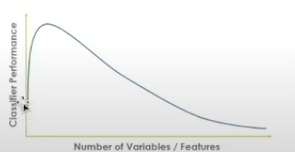<br>

**1.   Manual** <br>
       Hasil Observasi pakar (SME) Subject Matter Expert.<br>
**2.   Filter Method**<br>
       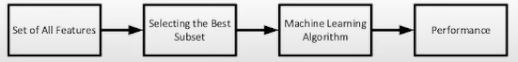 <br>
**3.   Wrapper Method**<br>
        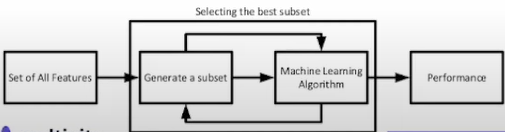 <br>
        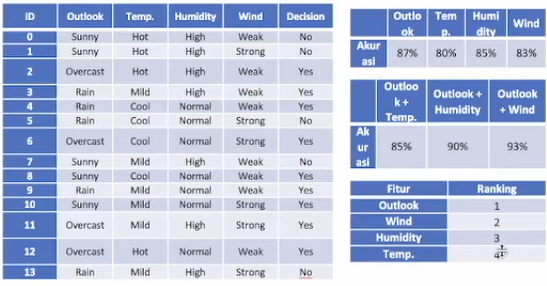
        <br>
**4.   Embedded Method**<br>
      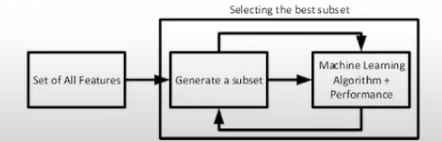 <br>
      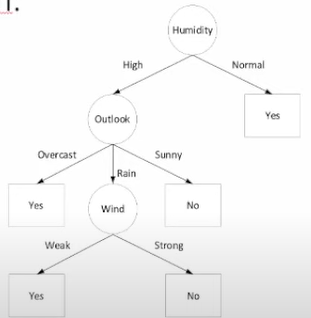



# **Attribute / Feature Section Algorm**

1.   Univariate Selection
2.   Feature Importance
3.   Correlation Matrix with heatmap



In [34]:
# @title ### ***Univariate Selection***
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/train.csv')
print(data)
X = data.iloc[:,0:20] #Attribute Column
y = data.iloc[:,-1] #target Column Price range

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [35]:
data.count()
#data.describe()

battery_power    2000
blue             2000
clock_speed      2000
dual_sim         2000
fc               2000
four_g           2000
int_memory       2000
m_dep            2000
mobile_wt        2000
n_cores          2000
pc               2000
px_height        2000
px_width         2000
ram              2000
sc_h             2000
sc_w             2000
talk_time        2000
three_g          2000
touch_screen     2000
wifi             2000
price_range      2000
dtype: int64

In [36]:
# @title ### ***Select Best Acuraccy 10 Attribute Using Kbest Feature***
bestfeatures= SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfscore = pd.DataFrame(fit.scores_)
df_columns =pd.DataFrame(X.columns)

featurescores = pd.concat([df_columns,dfscore], axis=1)
featurescores.columns=['specs','score'] #Naming Df Column

featurescores

specs          score
0   battery_power   14129.866576
1            blue       0.723232
2     clock_speed       0.648366
3        dual_sim       0.631011
4              fc      10.135166
5          four_g       1.521572
6      int_memory      89.839124
7           m_dep       0.745820
8       mobile_wt      95.972863
9         n_cores       9.097556
10             pc       9.186054
11      px_height   17363.569536
12       px_width    9810.586750
13            ram  931267.519053
14           sc_h       9.614878
15           sc_w      16.480319
16      talk_time      13.236400
17        three_g       0.327643
18   touch_screen       1.928429
19           wifi       0.422091

In [37]:
print(featurescores.nlargest(10,'score'))# print top 10 best Feature

            specs          score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


In [38]:
# @title ### ***Feature Importance***

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuild class feature_importance of tree based in classifier


[0.06071847 0.01945175 0.03448162 0.02008173 0.03330096 0.01703471
 0.03616353 0.03553464 0.03721699 0.03309229 0.03404259 0.04654105
 0.04946451 0.38630824 0.033763   0.03451368 0.0353058  0.01397626
 0.0189684  0.02003976]


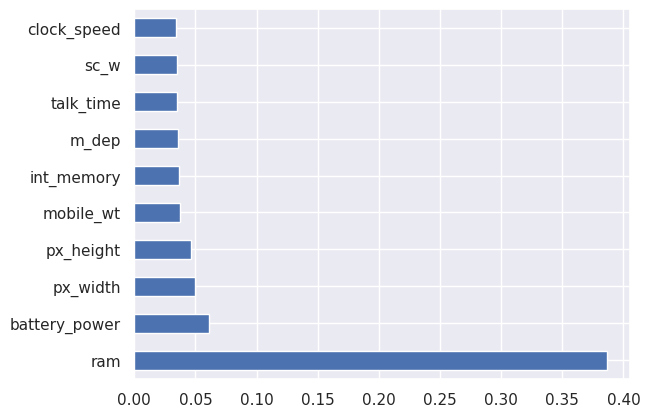

In [39]:
feat_importance=pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

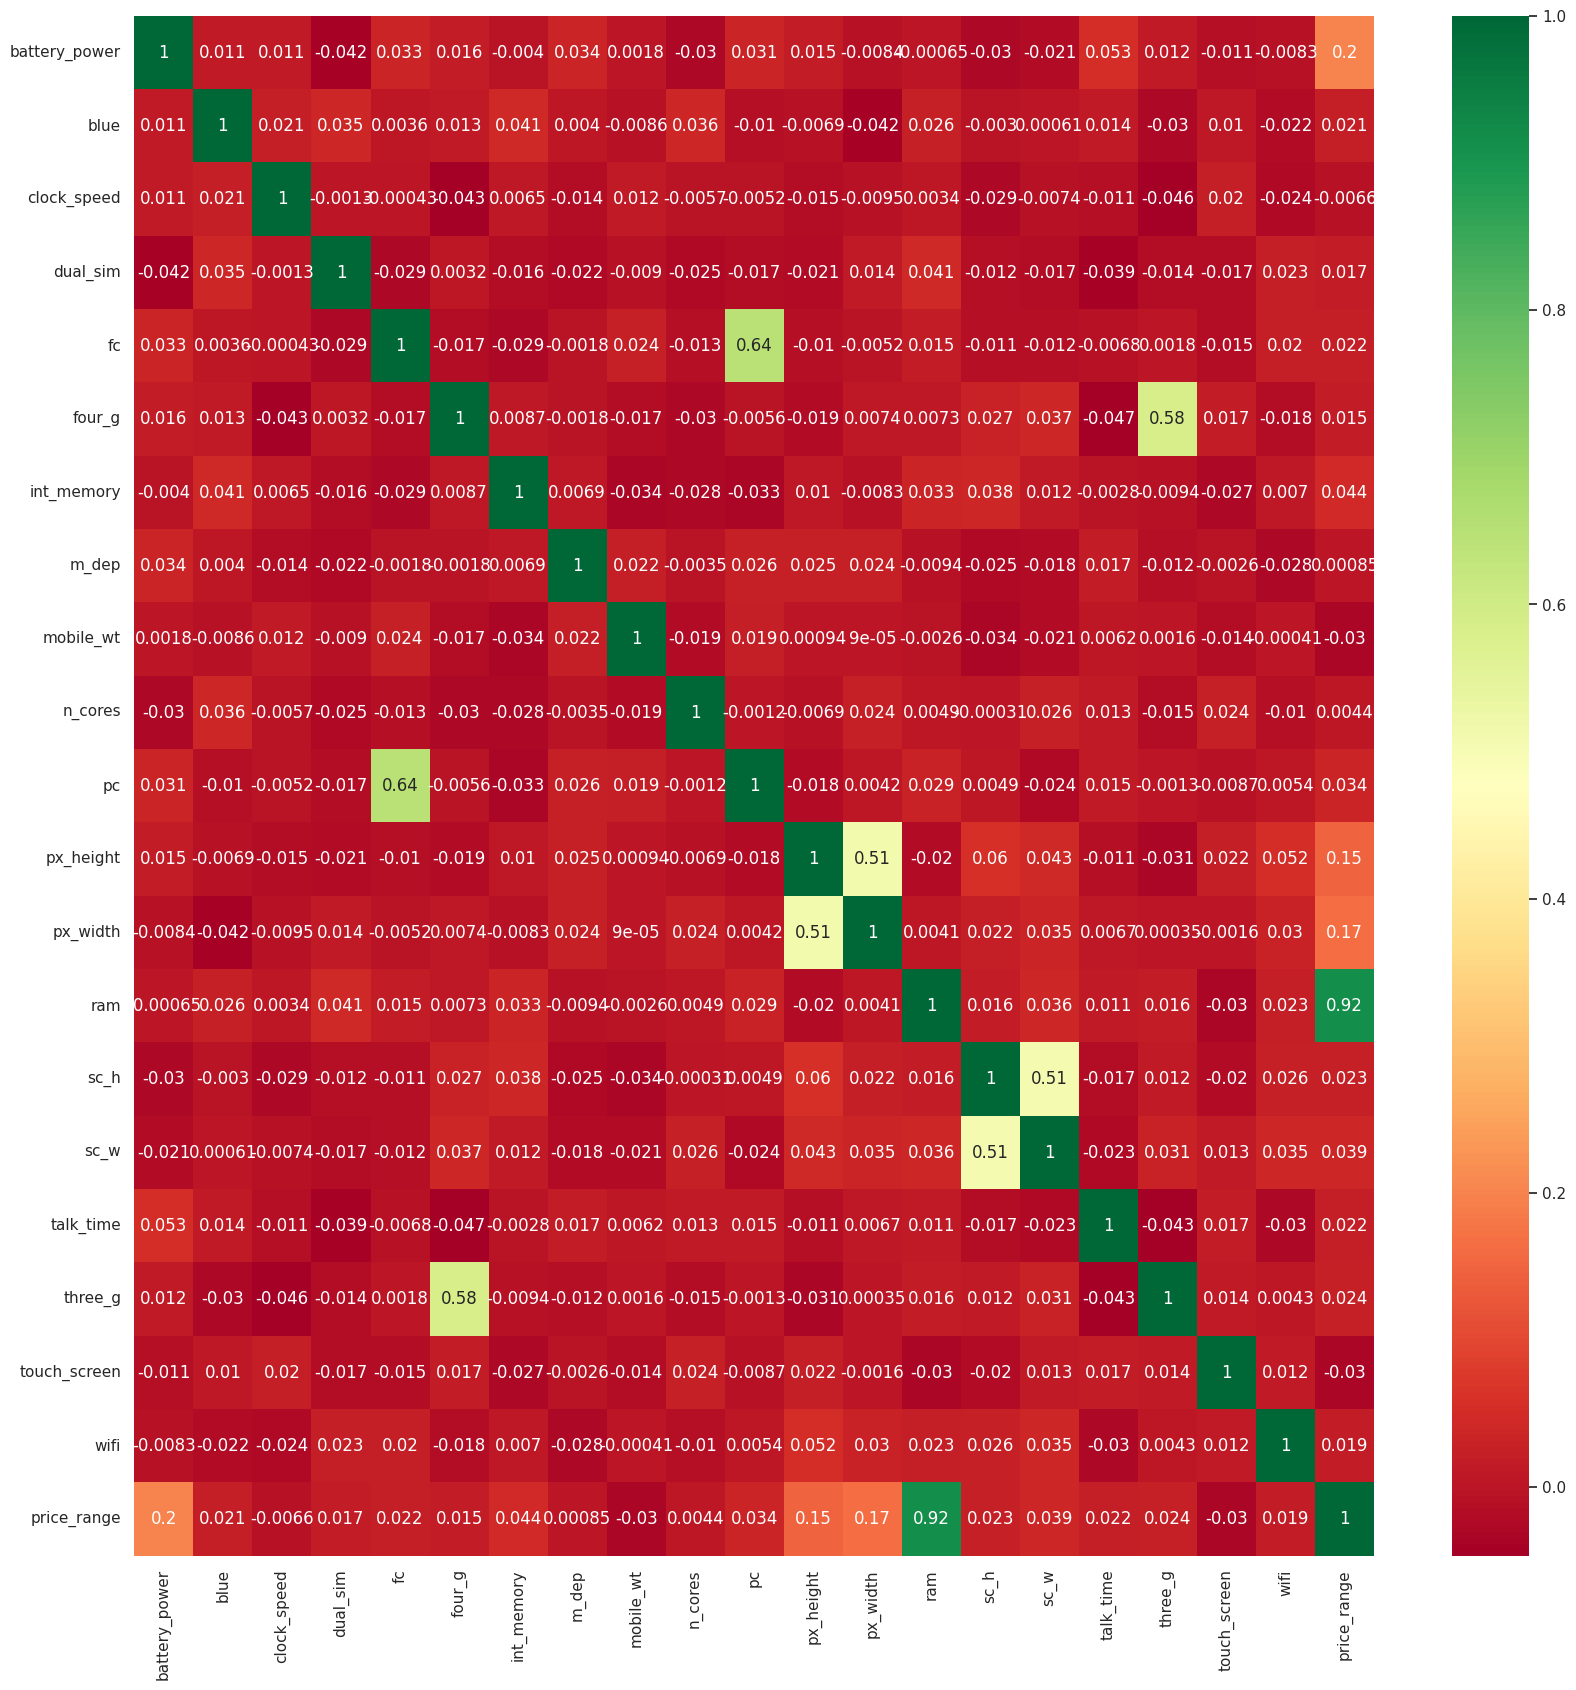

In [40]:
# @title ### ***Feature Correlation Matrix with heatmap***
import seaborn as sns

corrmat = data.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(data[top_corr_feature].corr(),annot= True,cmap='RdYlGn')

***Model Supervice Learning***
1.   Classification
2.   Regression
3.   Estimate

Perbedaan Classification dengan cluster, cluster mengelompokan data yang sejenis berdasarkan kedekatan 1 data dengan data yang lain, sedangkan classification sudah memiliki label sebelumnya.

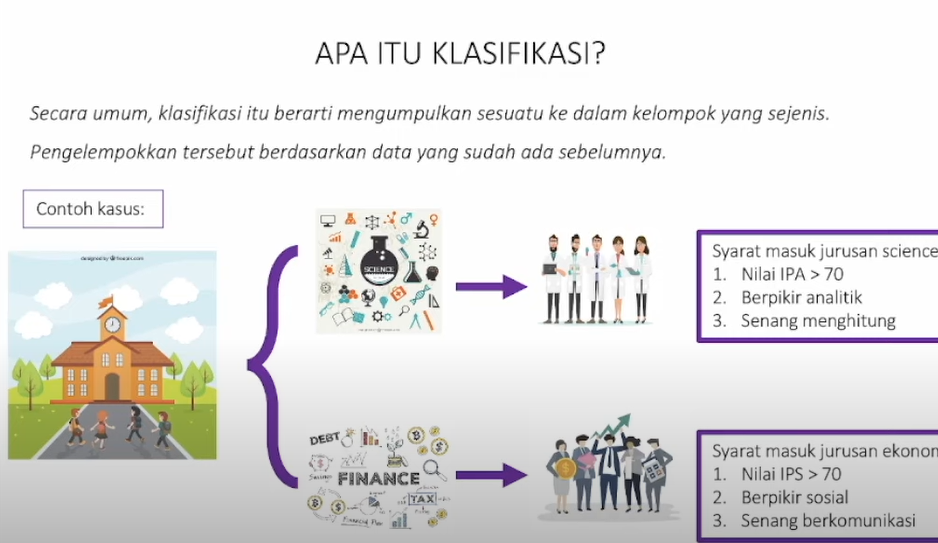 <br> 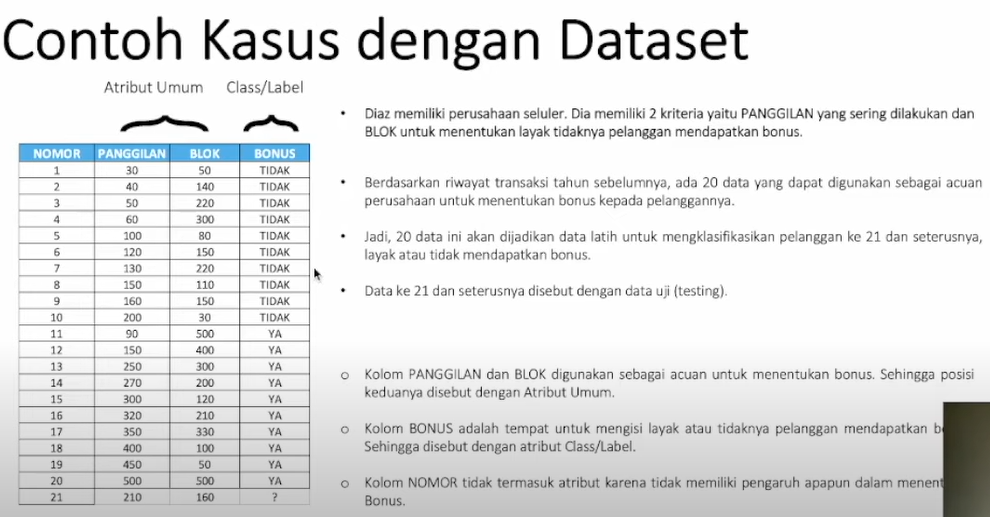 <br>
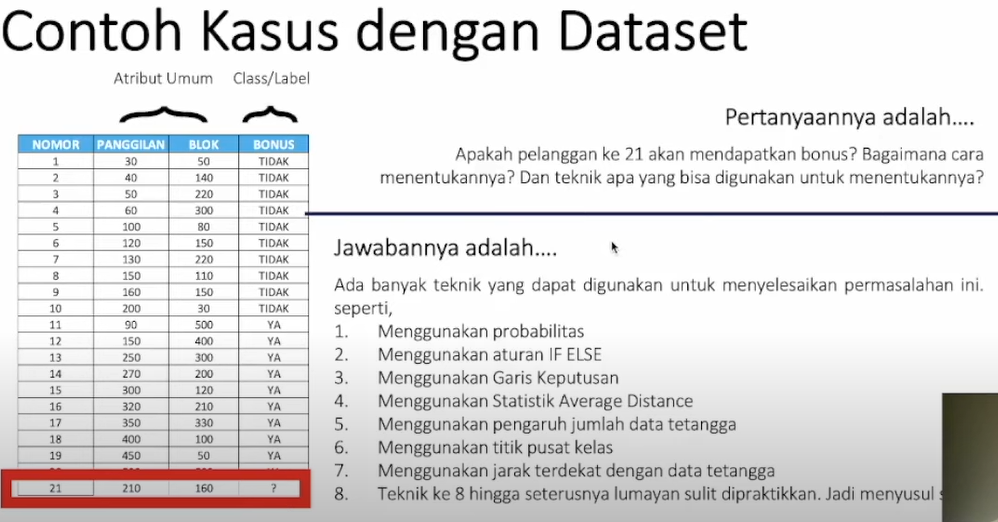


In [41]:
# @title ### ***Classification Using Decision Tree Category***
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/golf.txt')
print(data)
X = data.iloc[:,0:4] #Memasukan Column attriibute dari Outlook sampai Wind mulai dai 0 sampai dengan 4 column ke samping
y = data.iloc[:,-1] #memasukan Column paling kanan atau bila si outlook bernilai 0 maka decision bernilai -1 yang merupakan target Column

     Outlook Temp. Humidity    Wind  Decision
0      Sunny   Hot     High    Weak         0
1      Sunny   Hot     High  Strong         0
2   Overcast   Hot     High    Weak         1
3       Rain  Mild     High    Weak         1
4       Rain  Cool    0rmal    Weak         1
5       Rain  Cool    0rmal  Strong         0
6   Overcast  Cool    0rmal  Strong         1
7      Sunny  Mild     High    Weak         0
8      Sunny  Cool    0rmal    Weak         1
9       Rain  Mild    0rmal    Weak         1
10     Sunny  Mild    0rmal  Strong         1
11  Overcast  Mild     High  Strong         1
12  Overcast   Hot    0rmal    Weak         1
13      Rain  Mild     High  Strong         0


In [42]:
One_hot=pd.get_dummies(data[['Outlook','Temp.','Humidity','Wind']],drop_first=False)
One_hot

Outlook_Overcast  Outlook_Rain  Outlook_Sunny  Temp._Cool  Temp._Hot  \
0              False         False           True       False       True   
1              False         False           True       False       True   
2               True         False          False       False       True   
3              False          True          False       False      False   
4              False          True          False        True      False   
5              False          True          False        True      False   
6               True         False          False        True      False   
7              False         False           True       False      False   
8              False         False           True        True      False   
9              False          True          False       False      False   
10             False         False           True       False      False   
11              True         False          False       False      False   
12              True         False          False       False       True   
13             False          True          False       False      False   

    Temp._Mild  Humidity_0rmal  Humidity_High  Wind_Strong  Wind_Weak  
0        False           False           True        False       True  
1        False           False           True         True      False  
2        False           False           True        False       True  
3         True           False           True        False       True  
4        False            True          False        False       True  
5        False            True          False         True      False  
6        False            True          False         True      False  
7         True           False           True        False       True  
8        False            True          False        False       True  
9         True            True          False        False       True  
10        True            True          False         True      False  
11        True           False           True         True      False  
12       False            True          False        False       True  
13        True           False           True         True      False

In [43]:
data=data.drop(['Outlook','Temp.','Humidity','Wind'], axis=1)


In [44]:
X = pd.concat([One_hot,data],axis=1)
X

Outlook_Overcast  Outlook_Rain  Outlook_Sunny  Temp._Cool  Temp._Hot  \
0              False         False           True       False       True   
1              False         False           True       False       True   
2               True         False          False       False       True   
3              False          True          False       False      False   
4              False          True          False        True      False   
5              False          True          False        True      False   
6               True         False          False        True      False   
7              False         False           True       False      False   
8              False         False           True        True      False   
9              False          True          False       False      False   
10             False         False           True       False      False   
11              True         False          False       False      False   
12              True         False          False       False       True   
13             False          True          False       False      False   

    Temp._Mild  Humidity_0rmal  Humidity_High  Wind_Strong  Wind_Weak  \
0        False           False           True        False       True   
1        False           False           True         True      False   
2        False           False           True        False       True   
3         True           False           True        False       True   
4        False            True          False        False       True   
5        False            True          False         True      False   
6        False            True          False         True      False   
7         True           False           True        False       True   
8        False            True          False        False       True   
9         True            True          False        False       True   
10        True            True          False         True      False   
11        True           False           True         True      False   
12       False            True          False        False       True   
13        True           False           True         True      False   

    Decision  
0          0  
1          0  
2          1  
3          1  
4          1  
5          0  
6          1  
7          0  
8          1  
9          1  
10         1  
11         1  
12         1  
13         0

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

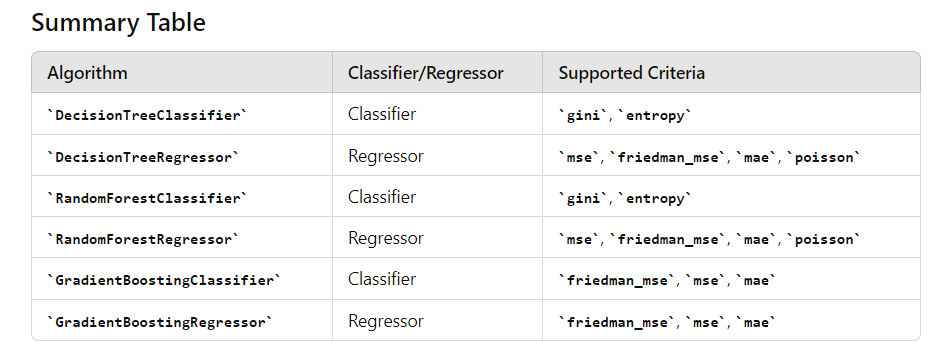

In [46]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy",random_state=100)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [47]:
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [48]:
y_test

3     1
7     0
6     1
2     1
10    1
Name: Decision, dtype: int64

In [49]:
y_pred

array([1, 0, 1, 1, 1])

***Random Forest*** <br>
Merupakan Sekumpulan dari Decission Tree yang kemudian di cari nilai mayoritasnya, semakin banyak kemungkinan maka peluang benar akan semakin besar, banyaknya kumpulan dession tree (Hyperparameter) bisa di atur jumlahnya, random forest memiliki qualitas accuracy benar yang lebih besar di banding decission tree karena satu decission tree sangat rentan overfitting sehingga di lakukan bagging.
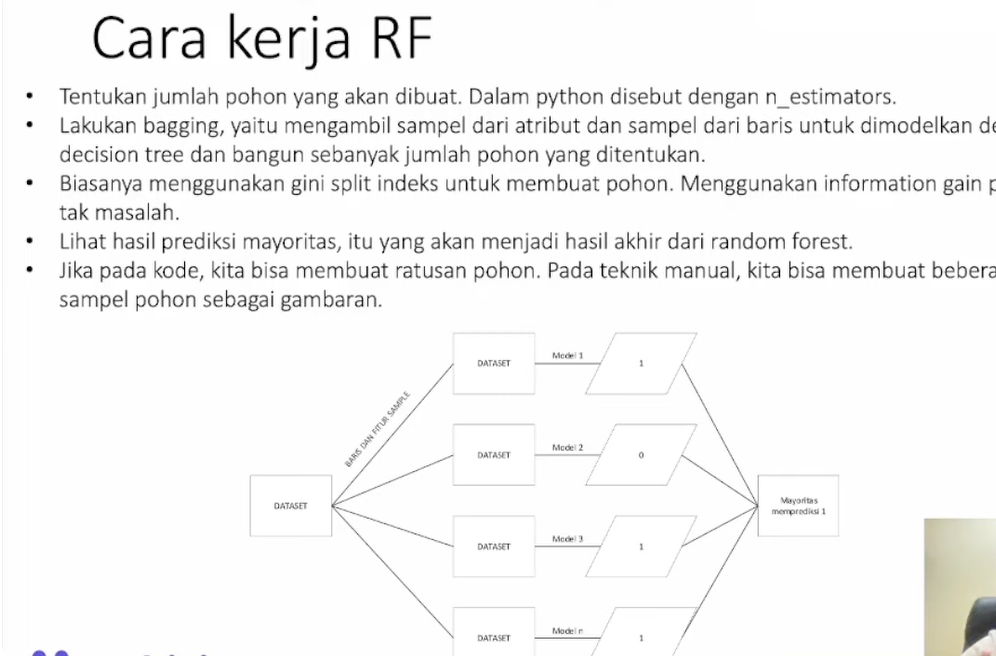 <br>
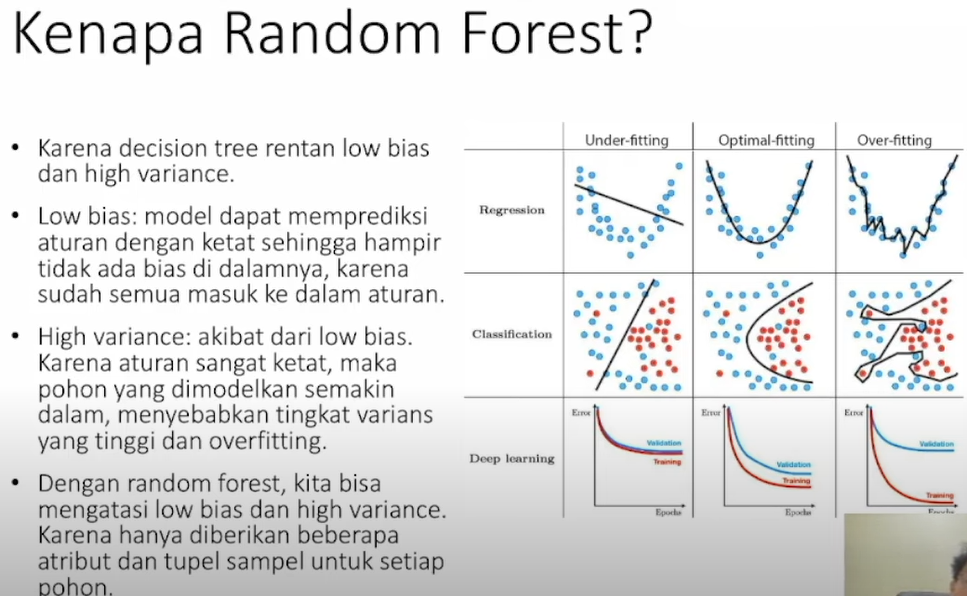

In [50]:
# @title ### ***Classification Using Random Forest***
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/covid19.csv')
print(data)
#X = data.iloc[:,0:3] #Memasukan Column attriibute dari Outlook sampai Wind mulai dai 0 sampai dengan 4 column ke samping
#y = data.iloc[:,-1]
X = data.iloc[:,0:3]
y = data.iloc[:,-1]

   temperatur badan  sesak nafas  batuk  diagnosis sakit covid-19
0                 1            1      0                         1
1                 0            1      1                         1
2                 0            0      0                         0
3                 1            0      1                         0
4                 1            1      0                         1
5                 0            1      0                         1
6                 1            1      1                         1
7                 0            0      1                         0


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=1)
model = RandomForestClassifier(criterion='gini', n_estimators=10 )
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [52]:
y_pred=model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


***K Nearest Neighbor and Pseudo (KNN)*** <br>
KNN hanya bisa menghitung Numberic karena Knn merupakan Algorm yang pengelompokannya tergantu jarak antar tetangga dengan data yang di cari

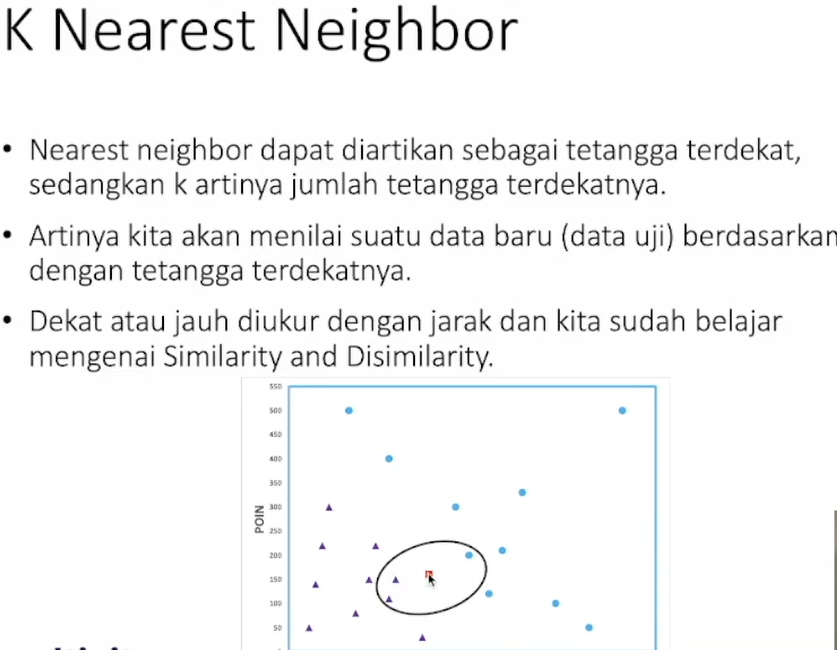

In [53]:
# @title ### ***KNN***
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

gizi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/gizi.csv')
print(gizi)

x=gizi.iloc[:,:-1]
y=gizi.iloc[:,5]

    Tinggi  Berat  L Perut  L Panggul  Lemak  Label
0    160.0     70     78.0       99.0   33.3      3
1    162.0     56     74.0       90.0   31.7      3
2    155.0     63     76.5       95.5   37.8      3
3    156.0     54     74.0       88.0   31.0      2
4    155.0     55     79.0       88.0   27.0      3
5    155.0     55     67.0       91.0   29.8      2
6    151.5     58     76.0       94.0   31.6      3
7    151.5     62     79.0       98.0   37.3      3
8    159.0     49     72.0       89.0   28.7      2
9    151.0     58     77.0       99.0   34.4      3
10   153.0     52     72.0       89.0   31.0      2
11   159.0     49     65.0       87.0   24.6      2


In [54]:
# @title ### ***Split Model Training***
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=1)
y_test

2     3
3     2
4     3
10    2
Name: Label, dtype: int64

In [55]:
# @title ### ***build Model Training KNN***
#Psudo KNN ganti weights nya menggunkan uniform  sendagakan kallau knn menggunkan distance
model = KNeighborsClassifier(n_neighbors=3,weights='distance',metric='euclidean')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_pred

array([3, 2, 3, 2])

In [56]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred) )

Accuracy: 1.0


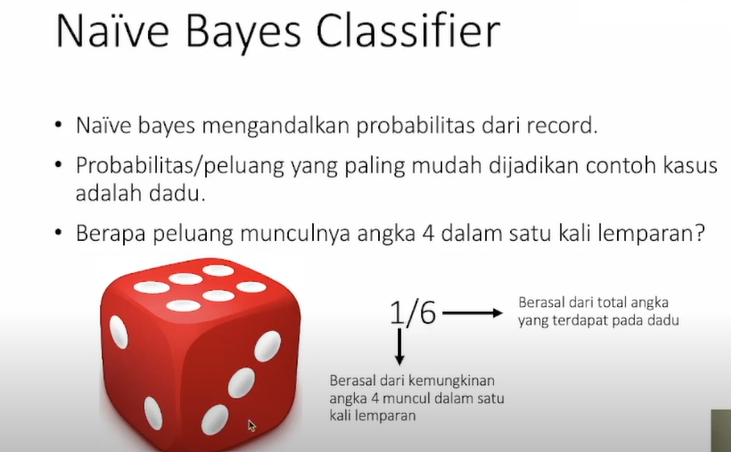

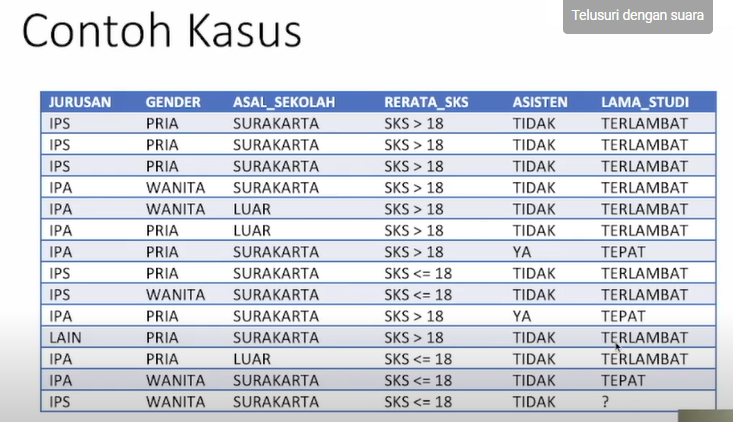

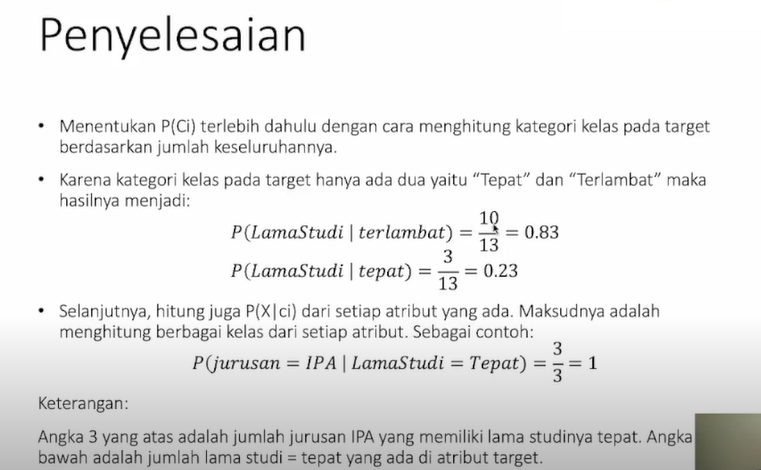

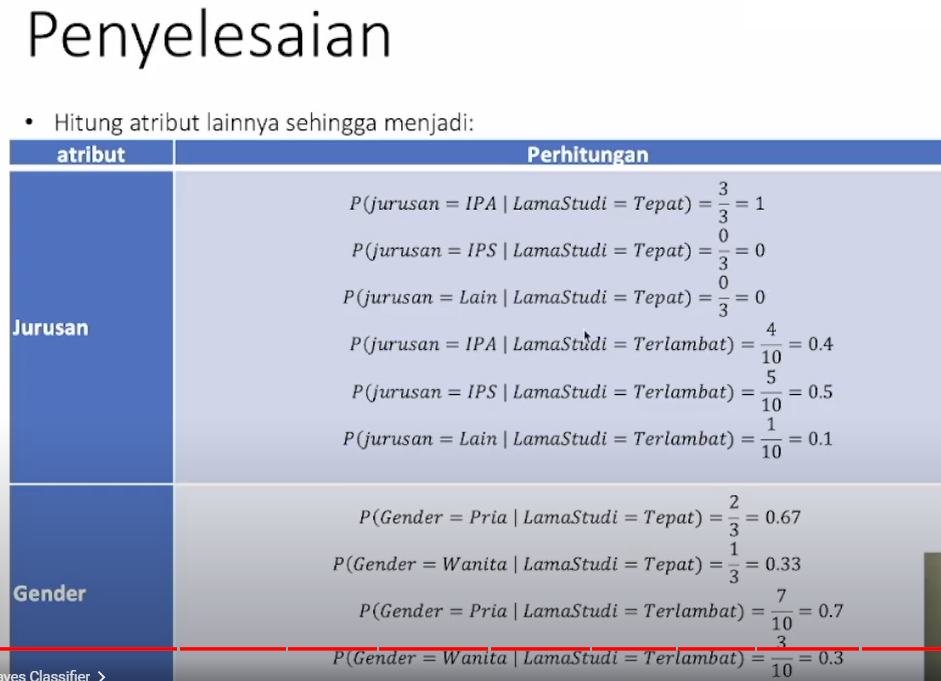

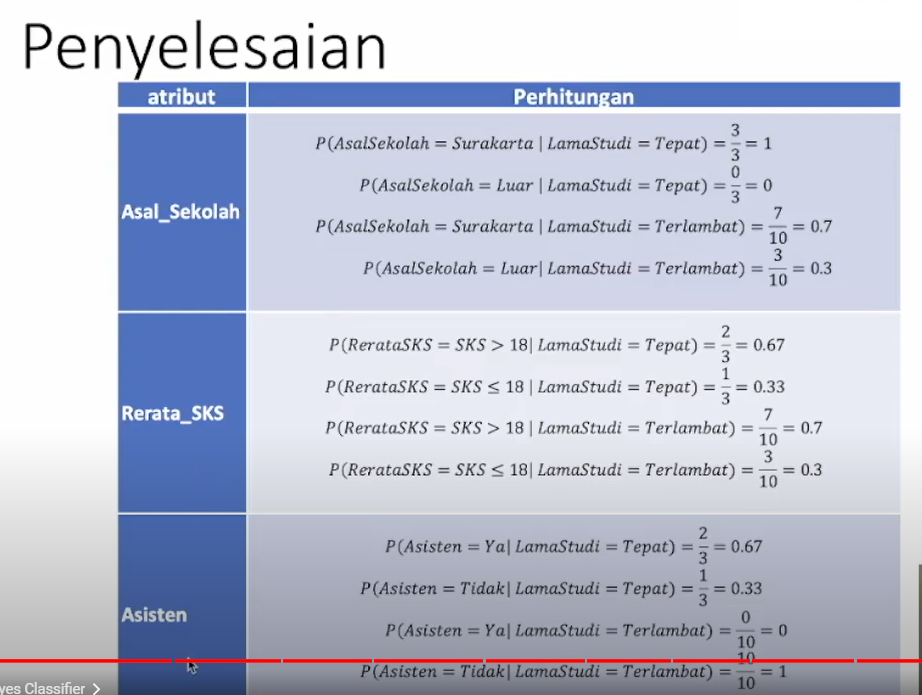

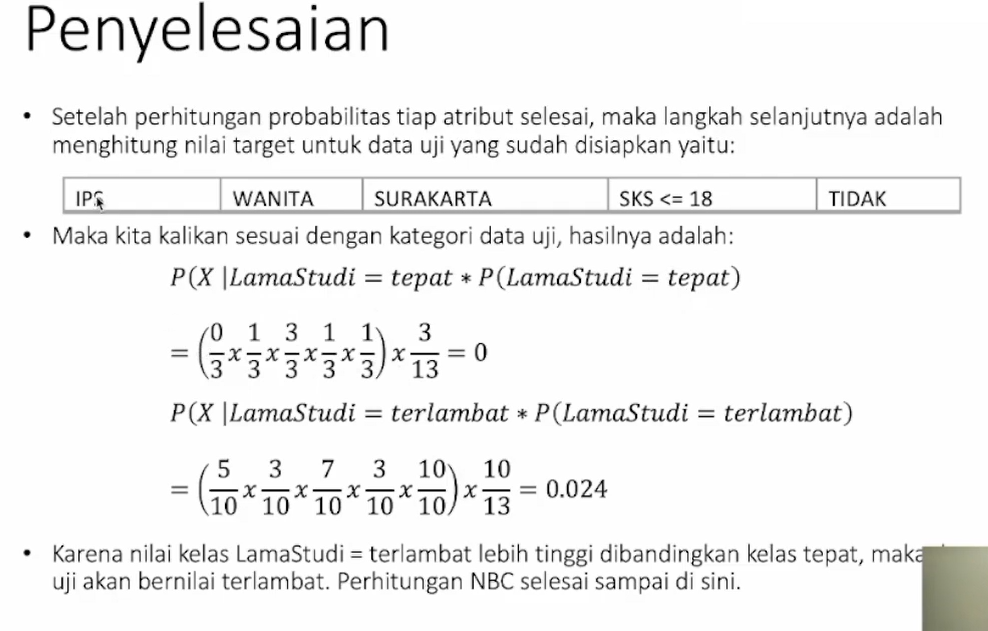

In [2]:
 #@title ### ***Naive Bayes Classifier***

 import pandas as pd
 import numpy as np
 from sklearn  import metrics
 from sklearn import